# Observed Trend:
    1. Majority of the Tweets fall in Neutral range, which is expected as the News should be non-sentimental.
    2. @CBS has the most negative tone for tweets, the average compund is -0.2 
    3. @Fox has the most number of negative tweets , with compund ranging < - 0.5

In [3]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re
import configuration as config

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Twitter API Keys
consumer_key = config.consumer_key
consumer_secret = config.consumer_secret
access_token = config.access_token
access_token_secret = config.access_token_secret

now = datetime.datetime.now()
rpt_DT = now.strftime("%Y-%m-%d")
print ("Current date and time using strftime:")
print (rpt_DT)

Current date and time using strftime:
2018-03-28


In [16]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [17]:
# Target Search Term
target_users = ("@BBCWorld","@CBSNews","@CNN","@FoxNews","@nytimes")
tweets_DF = pd.DataFrame()

tweets_DF['tweet#'] = ""
tweets_DF['user'] = ""
tweets_DF['tweet'] = ""
tweets_DF['cleanTweet'] = ""
tweets_DF['compound'] = ""
tweets_DF['positive'] = ""
tweets_DF['negative'] = ""
tweets_DF['neutral'] = ""
tweets_DF['cleancompound'] = ""
tweets_DF['cleanpositive'] = ""
tweets_DF['cleannegative'] = ""
tweets_DF['cleanneutral'] = ""

tweet_analysis = pd.DataFrame()
cleantweet_analysis = pd.DataFrame()

tweet_TXT = ''
cleanTweet_TXT = ''

# Array to hold sentiment
sentiment_array = []


In [18]:
counter = 0
for user in target_users:
    tweet_counter = 0
    for x in range(5):
        public_tweets = api.user_timeline(user , page=x)
        #print("Tweet -->Compound --> Positive --> Negative --> Neutral")
        #print("=======================================================")
        for tweet in public_tweets:
            tweets_DF.set_value(counter, 'tweet#', tweet_counter)
            tweets_DF.set_value(counter, 'user', user)
            
            tweet_TXT = tweet["text"]
            cleanTweet_TXT  = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet["text"]).split())
            
            tweets_DF.set_value(counter, 'tweet', tweet_TXT)
            tweets_DF.set_value(counter, 'cleanTweet',cleanTweet_TXT)
            tweet_analysis = analyzer.polarity_scores(tweet_TXT)
            tweets_DF.set_value(counter,'compound',float(tweet_analysis["compound"]))
            tweets_DF.set_value(counter,'positive',float(tweet_analysis["pos"]))
            tweets_DF.set_value(counter,'negative',float(tweet_analysis["neg"]))
            tweets_DF.set_value(counter,'neutral',float(tweet_analysis["neu"]))
            
            cleantweet_analysis = analyzer.polarity_scores(cleanTweet_TXT)
            tweets_DF.set_value(counter,'cleancompound',float(cleantweet_analysis["compound"]))
            tweets_DF.set_value(counter,'cleanpositive',float(cleantweet_analysis["pos"]))
            tweets_DF.set_value(counter,'cleannegative',float(cleantweet_analysis["neg"]))
            tweets_DF.set_value(counter,'cleanneutral',float(cleantweet_analysis["neu"]))
            
            #print(tweet["text"]+" : "
            #print(tweet["text"]+" : "
             # +str(tweet_analysis["compound"])+" , "
             # +str(tweet_analysis["pos"])+" , "
             # +str(tweet_analysis["neg"])+" , "
             # +str(tweet_analysis["neu"]))
            counter = counter + 1
            tweet_counter = tweet_counter + 1
       


/Users/Hadoop/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Hadoop/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Hadoop/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Hadoop/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel/__main__.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Hadoop/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: set_value i

In [19]:
tweets_DF.to_csv("NewsMoodData.csv", encoding="utf-8", index=True)
tweets_DF.head(5)

,tweet#,user,tweet,cleanTweet,compound,positive,negative,neutral,cleancompound,cleanpositive,cleannegative,cleanneutral
0,0,@BBCWorld,Utah trooper hit by skidding car https://t.co/...,Utah trooper hit by skidding car,0,0,0,1,0,0,0,1
1,1,@BBCWorld,Kim in Beijing: Why Xi's still the one he need...,Kim in Beijing Why Xi s still the one he needs...,0,0,0,1,0,0,0,1
2,2,@BBCWorld,Trèbes attack: Paris ceremony for hero policem...,Tr bes attack Paris ceremony for hero policema...,0.128,0.245,0.211,0.544,0.128,0.245,0.211,0.544
3,3,@BBCWorld,Australia's indigenous languages have one sour...,Australia s indigenous languages have one sour...,0,0,0,1,0,0,0,1
4,4,@BBCWorld,Tesla and Nvidia shares fall amid driverless c...,Tesla and Nvidia shares fall amid driverless c...,0,0.177,0.177,0.645,0,0.193,0.193,0.614


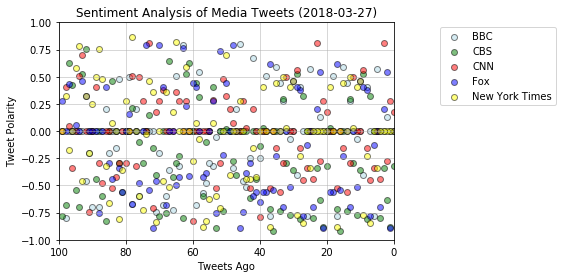

In [20]:
#Create datframes for each news organization

BBC_PD = tweets_DF.loc[tweets_DF["user"] == "@BBCWorld",:]
CBS_PD = tweets_DF.loc[tweets_DF["user"] == "@CBSNews",:]
CNN_PD = tweets_DF.loc[tweets_DF["user"] == "@CNN",:]
FOX_PD = tweets_DF.loc[tweets_DF["user"] == "@FoxNews",:]
NYT_PD = tweets_DF.loc[tweets_DF["user"] == "@nytimes",:]


#create plots
BBC_plot = plt.scatter(x=BBC_PD['tweet#'], y=BBC_PD['compound']
                              ,marker="o",c='lightblue', edgecolors="black"
                              ,alpha=0.5,label=BBC_PD["user"])

CBS_plot = plt.scatter(x=CBS_PD['tweet#'], y=CBS_PD['compound']
                              ,marker="o",c='green', edgecolors="black"
                              ,alpha=0.5,label=CBS_PD["user"])

CNN_plot = plt.scatter(x=CNN_PD['tweet#'], y=CNN_PD['compound']
                              ,marker="o",c='red', edgecolors="black"
                              ,alpha=0.5,label=CNN_PD["user"])

Fox_plot = plt.scatter(x=FOX_PD['tweet#'], y=FOX_PD['compound']
                              ,marker="o",c='blue', edgecolors="black"
                              ,alpha=0.5,label=FOX_PD["user"])

NYT_plot = plt.scatter(x=NYT_PD['tweet#'], y=NYT_PD['compound']
                              ,marker="o",c='yellow', edgecolors="black"
                              ,alpha=0.5,label=NYT_PD["user"])

#set plot features
plt.axis([100, 0, -1, 1])
plt.grid(linestyle='-', linewidth=0.5)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (" + rpt_DT + ")")


plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.legend((BBC_plot, CBS_plot, CNN_plot,Fox_plot,NYT_plot),('BBC', 'CBS','CNN','Fox','New York Times'), bbox_to_anchor=(1.5, 1.0))


plt.show()

plt.savefig('SentimentAnalysis_Media_Tweets_Plot.png')


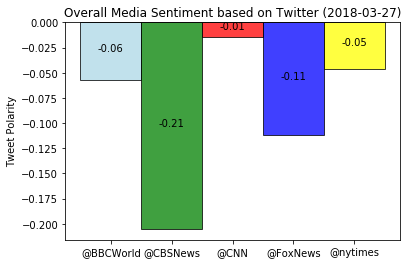

In [21]:
tweets_Group = tweets_DF.groupby(['user'])
tweets_compound = tweets_Group['compound'].sum()/tweets_Group['compound'].count()
tweets_compound_DF = pd.DataFrame(tweets_compound)
tweets_compound_DF['colors'] = ['lightblue','green','red','blue','yellow']
tweets_compound_DF.head()

tweets_compound_DF = tweets_compound_DF.reset_index()
tweets_compound_DF.head()
#tweets_compound_DF.plot(kind="bar",alpha=0.75, align="center",width=1,color=tweets_compound_DF['colors'],edgecolor='black')


plt.bar(tweets_compound_DF['user'], tweets_compound_DF['compound'], color=tweets_compound_DF['colors']
        , alpha=0.75, align="center",width=1,edgecolor='black')

plt.title("Overall Media Sentiment based on Twitter (" + rpt_DT + ")")
plt.ylabel("Tweet Polarity")


for a in [0,1,2,3,4]:
    plt.annotate(
            '{:,.2f}'.format(tweets_compound_DF.iloc[a]['compound']),  # Use values formated as label
            (a, (tweets_compound_DF.iloc[a]['compound'])/2),              # Place label at center of the bar
            ha='center',color='black')                   # align to center

plt.savefig('SentimentAnalysis_Media_Tweets_Bar.png')